In [1]:
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("train.csv")
df.head()

,Observation,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Energy
0,1111,22.700000,37.200,21.000000,38.000000,23.390000,37.290000,22.832857,34.942857,20.500000,...,45.360000,20.20,38.663333,12.80,760.050000,62.000000,3.5,28.0,5.65,70
1,1112,21.500000,41.045,20.500000,39.133333,22.926667,39.526667,21.700000,34.126667,18.633333,...,34.663333,19.73,37.933333,8.47,764.166667,48.166667,8.0,26.5,-1.92,210
2,1113,21.666667,38.000,22.600000,35.700000,21.890000,36.590000,22.000000,35.530000,19.000000,...,38.545000,19.79,39.430000,10.60,757.600000,57.000000,2.0,27.0,2.40,50
3,1114,23.290000,38.530,21.671429,38.000000,24.290000,36.200000,23.100000,35.090000,22.042857,...,38.600000,22.60,36.194286,11.60,760.600000,63.000000,1.0,40.0,4.67,50
4,1115,24.000000,42.560,26.830000,34.356000,26.530000,40.333333,24.500000,40.900000,21.500000,...,44.230000,22.60,44.090000,17.70,756.983333,63.000000,1.0,21.5,10.40,250


In [3]:
df.describe()

,Observation,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Energy
count,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,...,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000
mean,9000.500000,21.683008,40.263077,20.339386,40.426604,22.265359,39.242550,20.853829,39.037623,19.591562,...,42.934090,19.489357,41.559527,7.414789,755.514104,79.756982,4.041824,38.378577,3.765539,97.294043
std,4555.437959,1.613157,3.983819,2.199896,4.085470,2.013391,3.247703,2.046331,4.337781,1.849086,...,5.223342,2.020488,4.135306,5.321081,7.385701,14.877160,2.447902,11.810273,4.202025,100.932234
min,1111.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,...,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,10.000000
25%,5055.750000,20.730000,37.360000,18.790000,37.890000,20.790000,36.900000,19.500000,35.530000,18.270000,...,39.066667,18.000000,38.530000,3.680000,750.933333,70.166667,2.000000,29.000000,0.900000,50.000000
50%,9000.500000,21.600000,39.663333,20.000000,40.500000,22.100000,38.560000,20.666667,38.433333,19.390000,...,42.376214,19.390000,40.900000,6.930000,756.100000,83.666667,3.666667,40.000000,3.470000,60.000000
75%,12945.250000,22.600000,43.090000,21.530000,43.290000,23.290000,41.760000,22.100000,42.193333,20.633333,...,46.560000,20.600000,44.363333,10.400000,760.900000,91.666667,5.500000,40.000000,6.550000,100.000000
max,16890.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.745000,...,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,850.000000


In [4]:
#Rows containing null fields
null_data=df[df.isnull().any(axis=1)]
print(null_data)

Empty DataFrame
Columns: [Observation, T1, RH_1, T2, RH_2, T3, RH_3, T4, RH_4, T5, RH_5, T6, RH_6, T7, RH_7, T8, RH_8, T9, RH_9, T_out, Press_mm_hg, RH_out, Windspeed, Visibility, Tdewpoint, Energy]
Index: []

[0 rows x 26 columns]


In [5]:
y=df.pop("Energy")


In [6]:
numeric_variables=list(df.dtypes[df.dtypes=='Object'].index)
df[numeric_variables].head()

""
0
1
2
3
4


In [7]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, train_size=0.70, random_state=1)

C:\Users\Humza\AppData\Roaming\Python\Python36\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print('Coefficients: \n',lm.coef_)

Coefficients: 
 [ -1.65823535e-04   1.71767830e+00   1.72005506e+01  -2.09192295e+01
  -1.45046953e+01   2.29135973e+01   5.25916879e+00   4.14488258e+00
   1.71066317e+00  -5.48302449e-01   2.35086424e-01   7.43776689e+00
   3.30211056e-01   3.12358833e-01  -1.94953421e+00   1.10730781e+01
  -6.01873696e+00  -2.07579010e+01  -2.09702206e+00  -6.76363504e+00
   1.90146112e-01  -7.86574174e-03   2.94117462e+00   8.50198053e-02
   1.26604747e+00]


In [9]:
predictions = lm.predict(X_test)

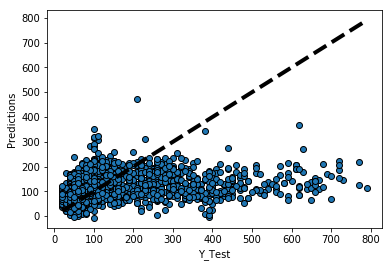

In [10]:
fig, ax = plt.subplots()
ax.scatter(y_test, predictions, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Y_Test')
ax.set_ylabel('Predictions')
plt.show()

In [11]:
from sklearn import metrics

In [12]:
print('MSE: ',metrics.mean_squared_error(y_test,predictions))

MSE:  8768.53753412


In [13]:
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

RMSE:  93.6404695317


In [15]:
df1=pd.read_csv("test.csv")
df1.head()

,Observation,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,50001,21.100000,39.90,19.290000,41.260000,21.500000,40.700000,18.89,41.200000,18.088889,...,21.600000,47.090000,18.100000,44.90,2.70,733.633333,98.166667,2.0,34.833333,2.43
1,50002,22.600000,39.03,20.790000,40.463333,22.290000,38.290000,20.29,36.700000,20.760000,...,23.760000,39.266667,19.390000,37.50,7.27,756.666667,82.000000,2.0,40.000000,4.40
2,50003,21.000000,35.59,19.790000,34.900000,21.166667,35.833333,20.39,33.090000,18.000000,...,22.600000,34.126667,18.200000,39.79,6.05,751.250000,50.000000,6.5,34.500000,-3.70
3,50004,20.566667,37.59,20.566667,35.700000,20.166667,37.000000,22.00,35.326667,17.700000,...,20.666667,36.966667,18.000000,41.29,9.35,758.716667,58.333333,1.0,25.166667,1.48
4,50005,21.500000,38.70,18.566667,42.030000,22.500000,38.900000,20.00,39.000000,19.633333,...,23.390000,45.326667,20.133333,43.20,3.03,758.850000,95.000000,2.0,60.333333,2.25


In [16]:
prediction=lm.predict(df1)
print(prediction)

[  62.52525995   91.35329753  143.70960476 ...,   60.33820127  108.30184523
  182.64084627]


In [22]:
np.savetxt("foo.csv",prediction, delimiter=",")